# Course 1: Classification and Vector Spaces
# Week 2: Visualizing Naive Bayes

In this lab, we will cover an essential part of data analysis that has not been included in the lecture videos. As we stated in the previous module, data visualization gives insight into the expected performance of any model.

In the following exercise, you are going to make a visual inspection of the tweets dataset using the Naïve Bayes features. We will see how we can understand the log-likelihood ratio explained in the videos as a pair of numerical features that can be fed in a machine learning algorithm.

At the end of this lab, we will introduce the concept of confidence ellipse as a tool for representing the Naïve Bayes model visually.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## Calculate the likelihoods for each tweet
For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.

In [5]:
# Load bayes_features.csv
data = pd.read_csv('bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


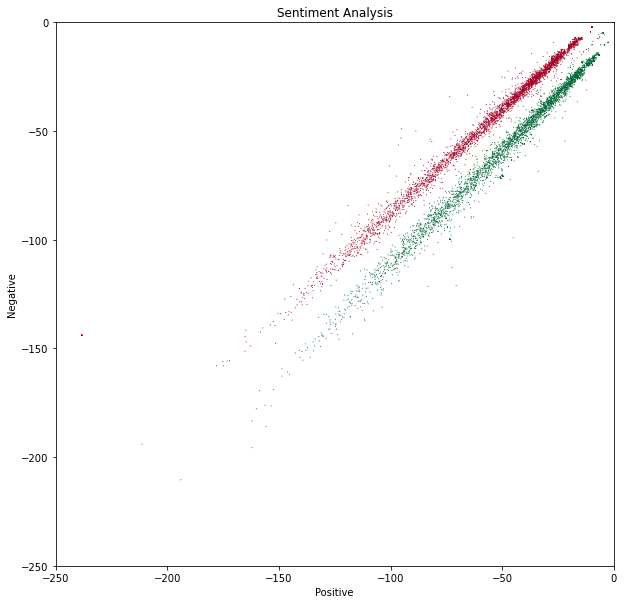

In [17]:
# Plot the dataframe
# Columns positive, negative and sentiment
# Colormap is red and green
# Size of dot is 0.1
# Lims lower limit -250

fix, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['positive'], data['negative'], c=data['sentiment'], cmap='RdYlGn', s=1, lw=0, alpha=1)
ax.set_xlim(-250, 0)
ax.set_ylim(-250, 0)
ax.set_xlabel('Positive')
ax.set_ylabel('Negative')
ax.set_title('Sentiment Analysis')
plt.show()


## Using Confidence Ellipses to interpret Naïve Bayes
In this section, we will use the confidence ellipse to give us an idea of what the Naïve Bayes model see.

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters:

Center: It is the numerical mean of the attributes
Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse.
Angle: Related with the covariance among attributes.
The parameter n_std stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

About 68% of the area under the curve falls within 1 standard deviation around the mean.
About 95% of the area under the curve falls within 2 standard deviations around the mean.
About 99.7% of the area under the curve falls within 3 standard deviations around the mean.

In [42]:
# Positive data
# Mean
data_pos = data[data['sentiment'] == 1]
mu_pos = np.array([np.mean(data_pos['positive']), np.mean(data_pos['negative'])])
# Standard deviation
sd_pos = np.array([np.std(data_pos['positive']), np.std(data_pos['negative'])])

# Negative data
# Mean
data_neg = data[data['sentiment'] == 0]
mu_neg = np.array([np.mean(data_neg['positive']), np.mean(data_neg['negative'])])
# Standard deviation
sd_neg = np.array([np.std(data_neg['positive']), np.std(data_neg['negative'])])

print("Mean of positive data: ", mu_pos)
print("Mean of negative data: ", mu_neg)

Mean of positive data:  [-45.9930292  -55.58943197]
Standard deviation of positive data:  [30.6372181  32.79385067]
Mean of negative data:  [-56.50119208 -45.7251721 ]
Standard deviation of negative data:  [35.95874824 31.36976387]


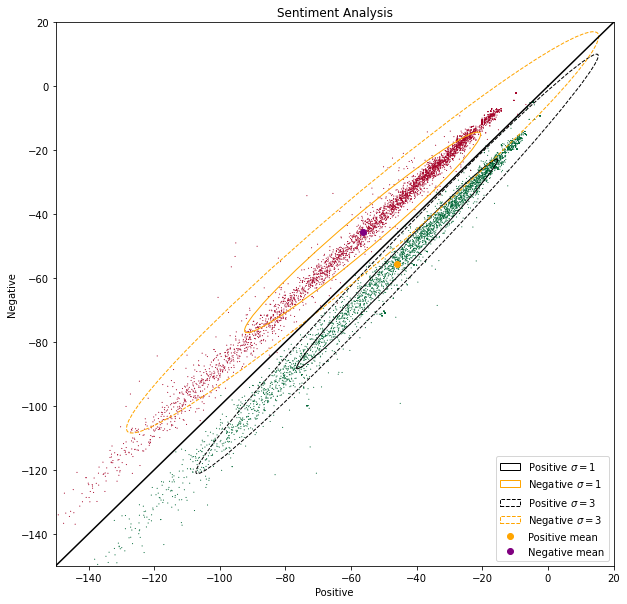

In [90]:
# Plot the dataframe, and the two mus
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data['positive'], data['negative'], c=data['sentiment'], cmap='RdYlGn', s=1.2, lw=0, alpha=1)
ax.set_xlim(-150, 20)
ax.set_ylim(-150, 20)
ax.set_xlabel('Positive')
ax.set_ylabel('Negative')
ax.set_title('Sentiment Analysis')
# Plot a diagonal line
ax.plot([-150, 20], [-150, 20], 'k-')

# Plot the two confidence ellipses for negative and positive data
# confidence_ellipse(data_pos['positive'], data_pos['negative'],
#     ax, n_std=1, label='Positive', edgecolor='red', facecolor='none')

# Plot confidence for positive and negative. Std 1 solid line, std 2 dashed
confidence_ellipse(data_pos['positive'], data_pos['negative'],
    ax, n_std=1, edgecolor='black', facecolor='none', label=r'Positive $\sigma=1$')
confidence_ellipse(data_neg['positive'], data_neg['negative'],
    ax, n_std=1, edgecolor='orange', facecolor='none', label=r'Negative $\sigma=1$')
confidence_ellipse(data_pos['positive'], data_pos['negative'],
    ax, n_std=2, edgecolor='black', facecolor='none', linestyle='--', label=r'Positive $\sigma=3$')
confidence_ellipse(data_neg['positive'], data_neg['negative'],
    ax, n_std=2, edgecolor='orange', facecolor='none', linestyle='--', label=r'Negative $\sigma=3$')

# Plot mu for positive and negative
ax.plot(mu_pos[0], mu_pos[1], 'o', color='orange', label='Positive mean')
ax.plot(mu_neg[0], mu_neg[1], 'o', color='purple', label='Negative mean')

# Legend down right
ax.legend(loc='lower right')


plt.show()
